In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [52]:
data = pd.read_csv('train.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [55]:
data.duplicated().sum()

0

In [56]:
# Check for null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
data.drop('Cabin', axis = 1, inplace = True)

In [58]:
avg_age = data['Age'].mean()
data.Age.replace(np.nan, avg_age, inplace = True)

In [59]:
freq_port = data.Embarked.dropna().mode()[0]
data['Embarked'] = data['Embarked'].fillna(freq_port)

In [60]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# -------------------------------------------------------------------------------

<AxesSubplot:xlabel='Survived', ylabel='count'>

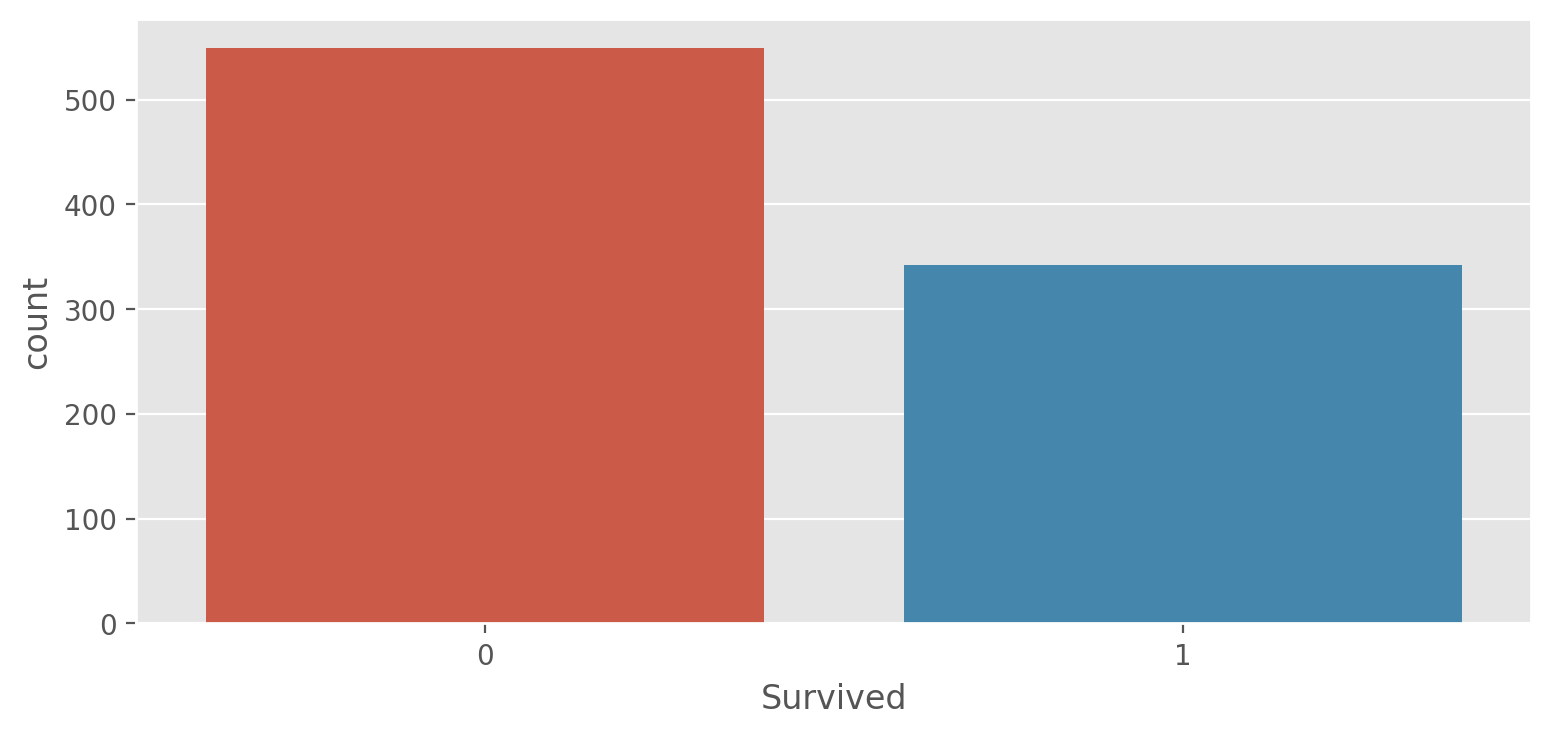

In [61]:
plt.figure(figsize = (9,4), dpi = 200)
sns.countplot(x = 'Survived', data = data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

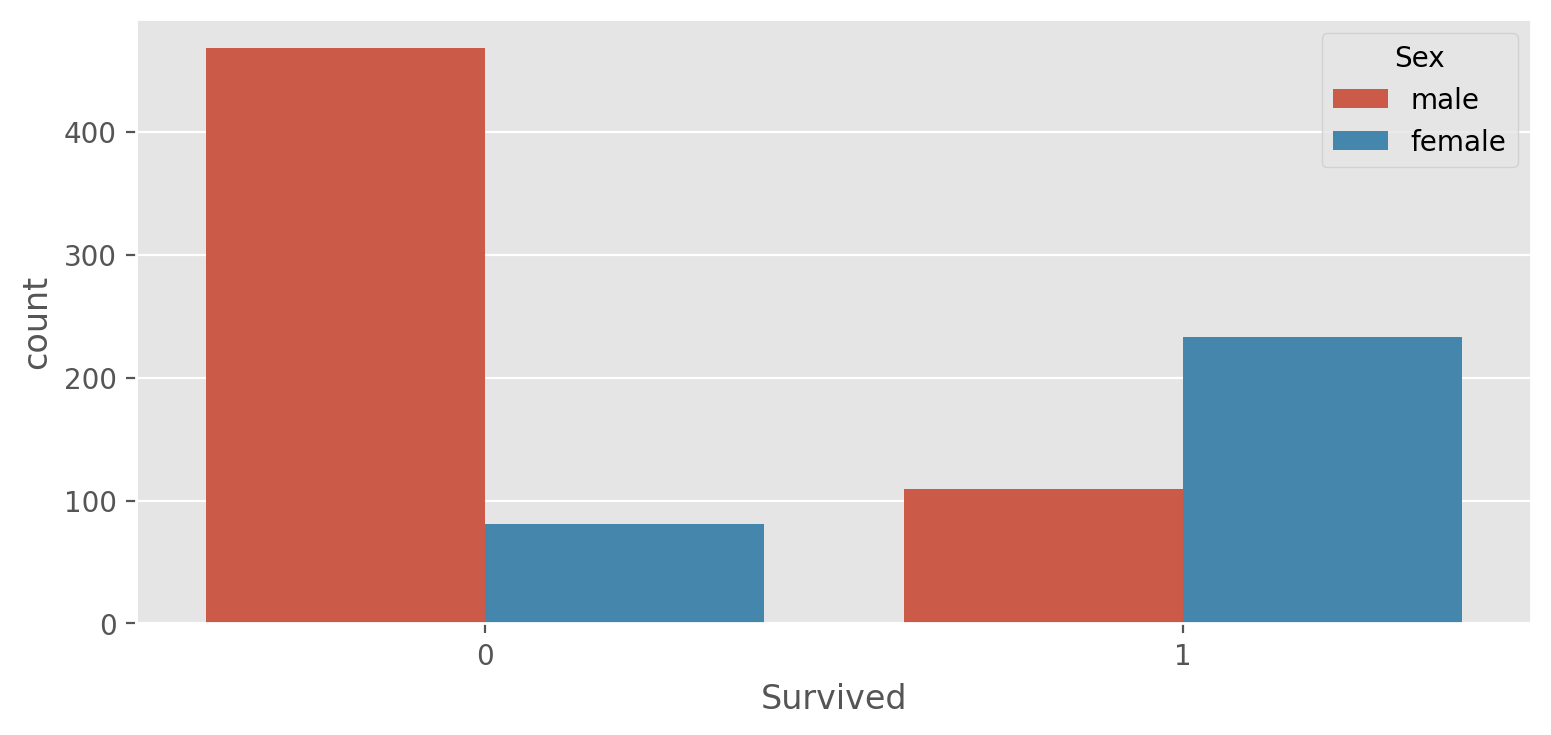

In [62]:
plt.figure(figsize = (9,4), dpi = 200)
sns.countplot(x = 'Survived', hue = 'Sex',data = data)

In [63]:
data.groupby(['Sex'])['Survived'].value_counts(normalize = True)

Sex     Survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

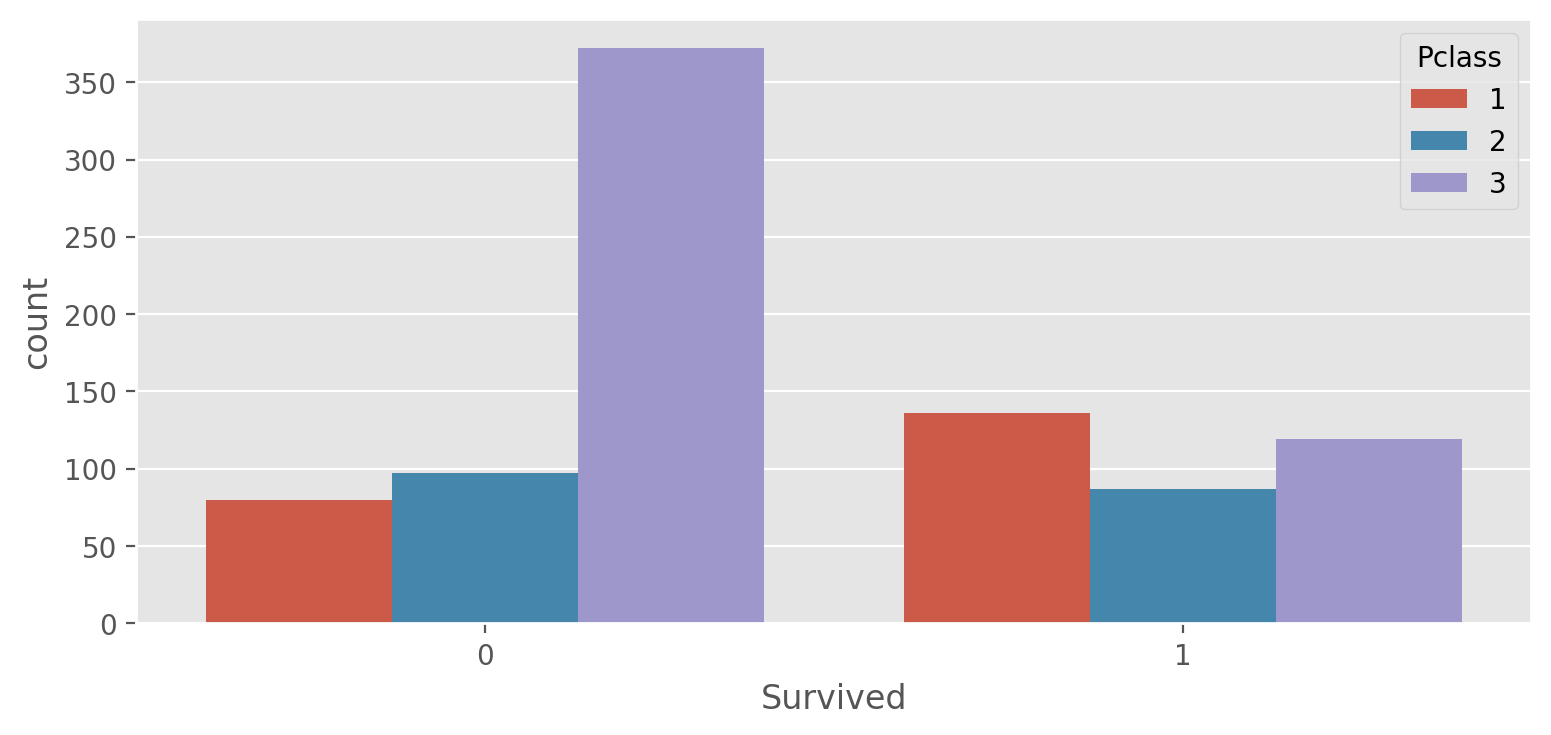

In [64]:
plt.figure(figsize = (9,4), dpi = 200)
sns.countplot(x = 'Survived', hue = 'Pclass', data = data)

In [65]:
data.groupby(['Pclass'])['Survived'].value_counts(normalize = True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

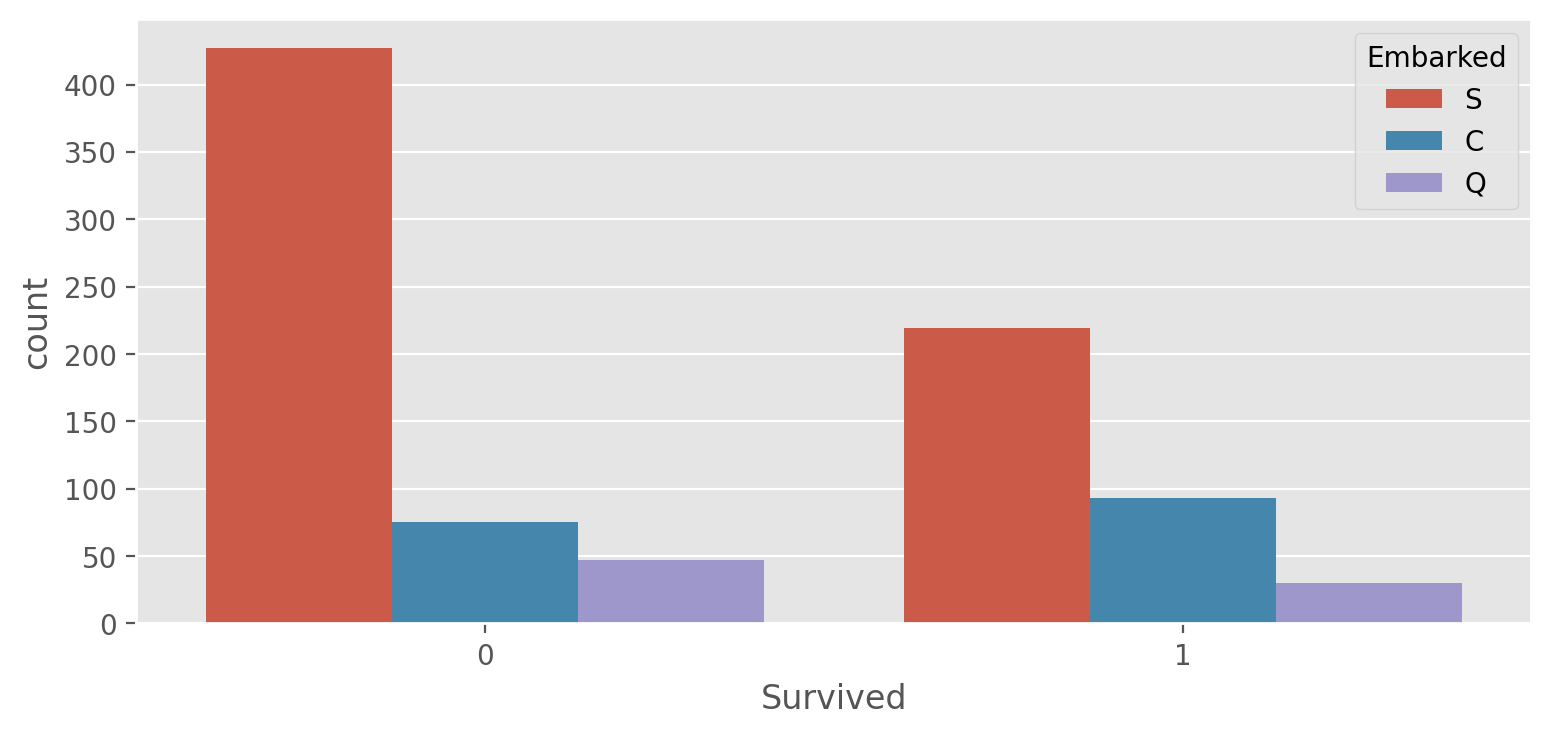

In [66]:
plt.figure(figsize = (9,4), dpi = 200)
sns.countplot(x = 'Survived', hue = 'Embarked', data = data)

In [67]:
data.groupby(['Embarked'])['Survived'].value_counts(normalize = True)

Embarked  Survived
C         1           0.553571
          0           0.446429
Q         0           0.610390
          1           0.389610
S         0           0.660991
          1           0.339009
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='Age'>

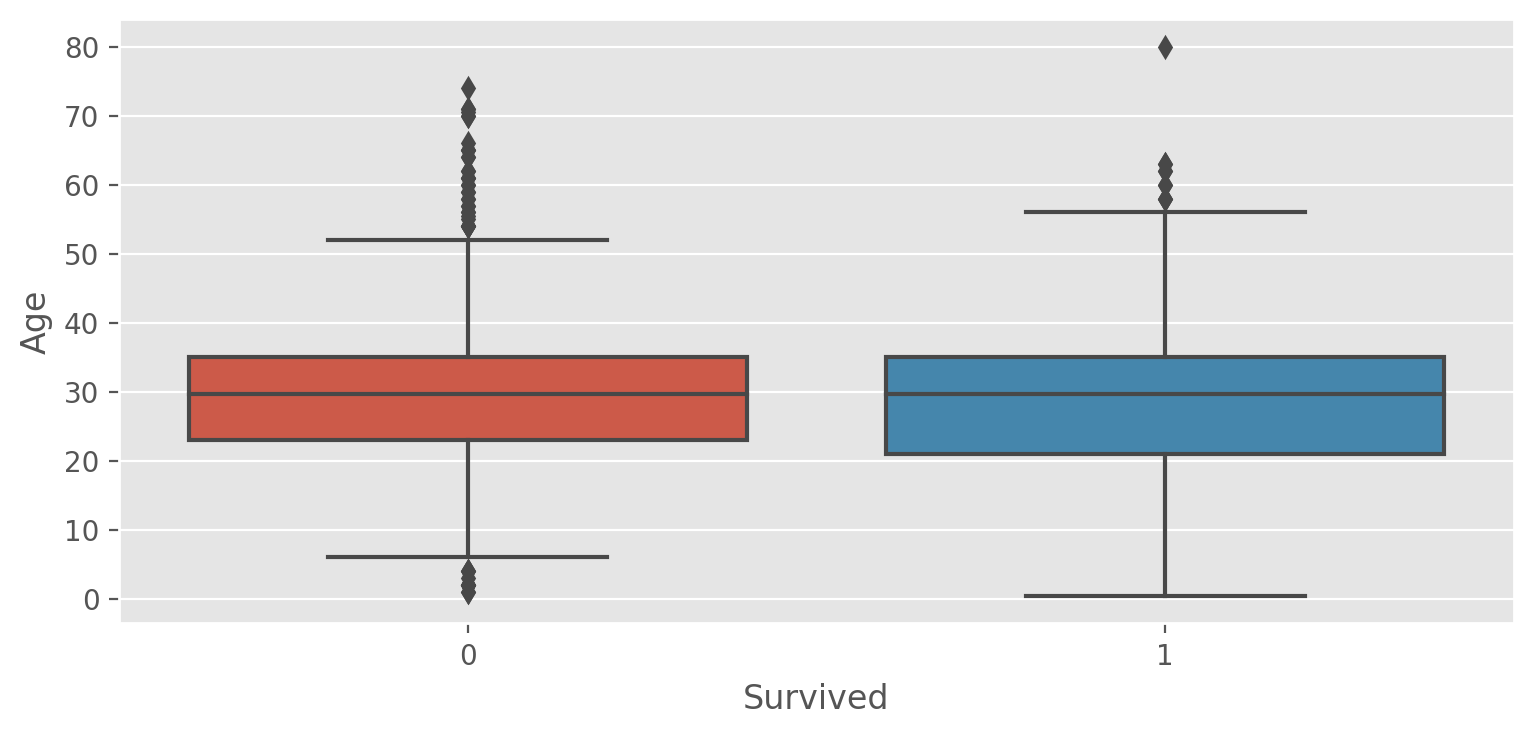

In [68]:
plt.figure(figsize = (9,4), dpi = 200)
sns.boxplot(x = 'Survived', y = 'Age', data = data)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

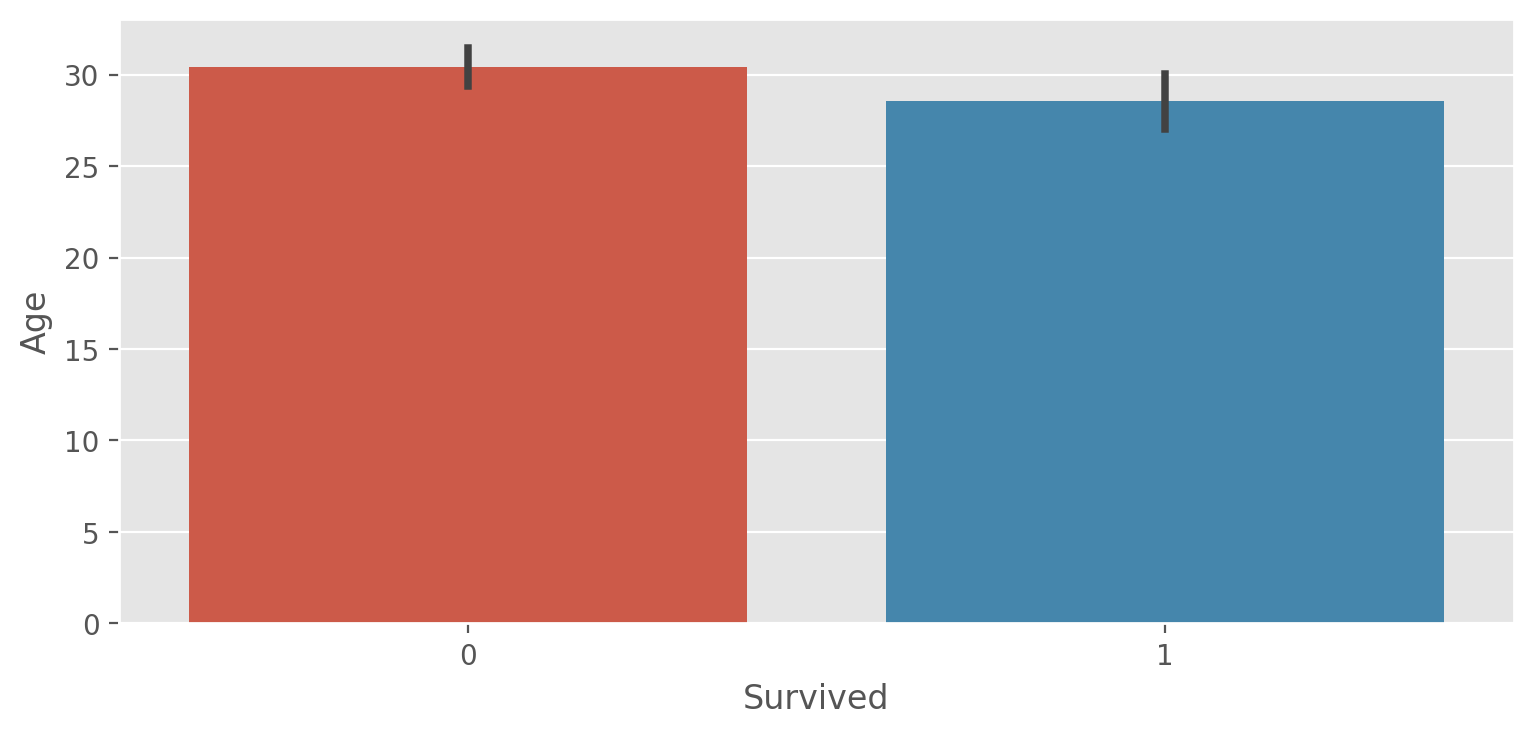

In [69]:
plt.figure(figsize = (9,4), dpi = 200)
sns.barplot(x = 'Survived', y = 'Age', data = data)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

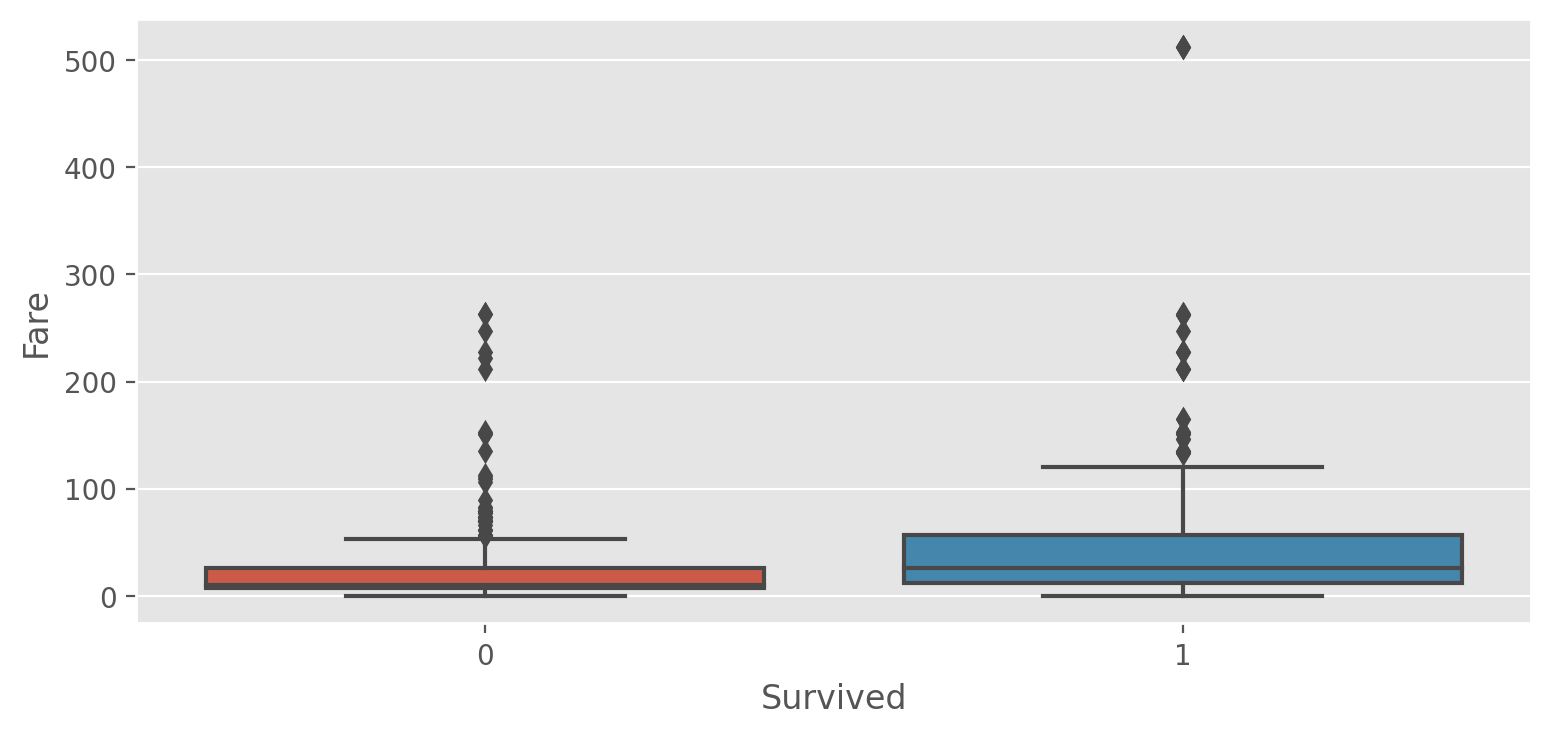

In [70]:
plt.figure(figsize = (9,4), dpi = 200)
sns.boxplot(x = 'Survived', y = 'Fare', data = data)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

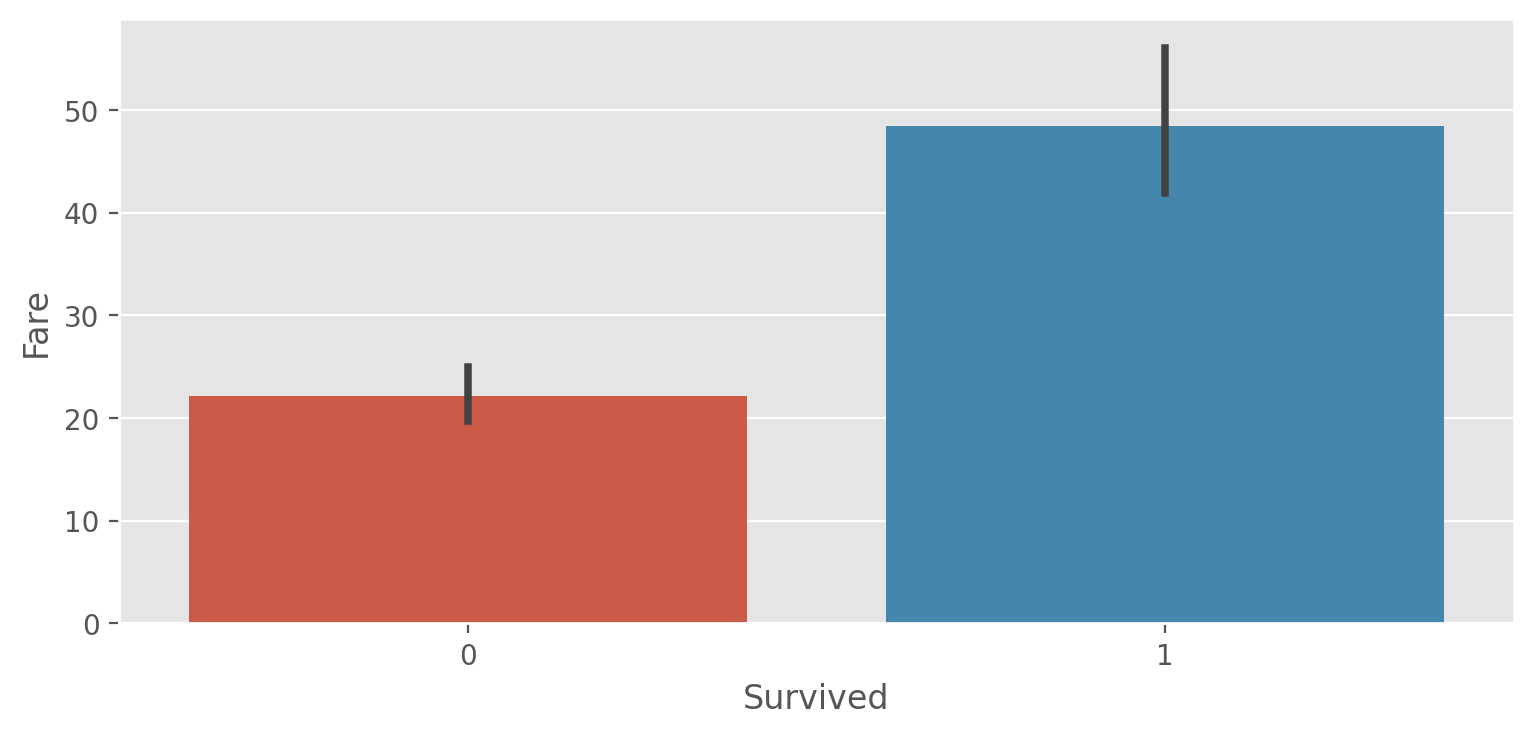

In [71]:
plt.figure(figsize = (9,4), dpi = 200)
sns.barplot(x = 'Survived', y = 'Fare', data = data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

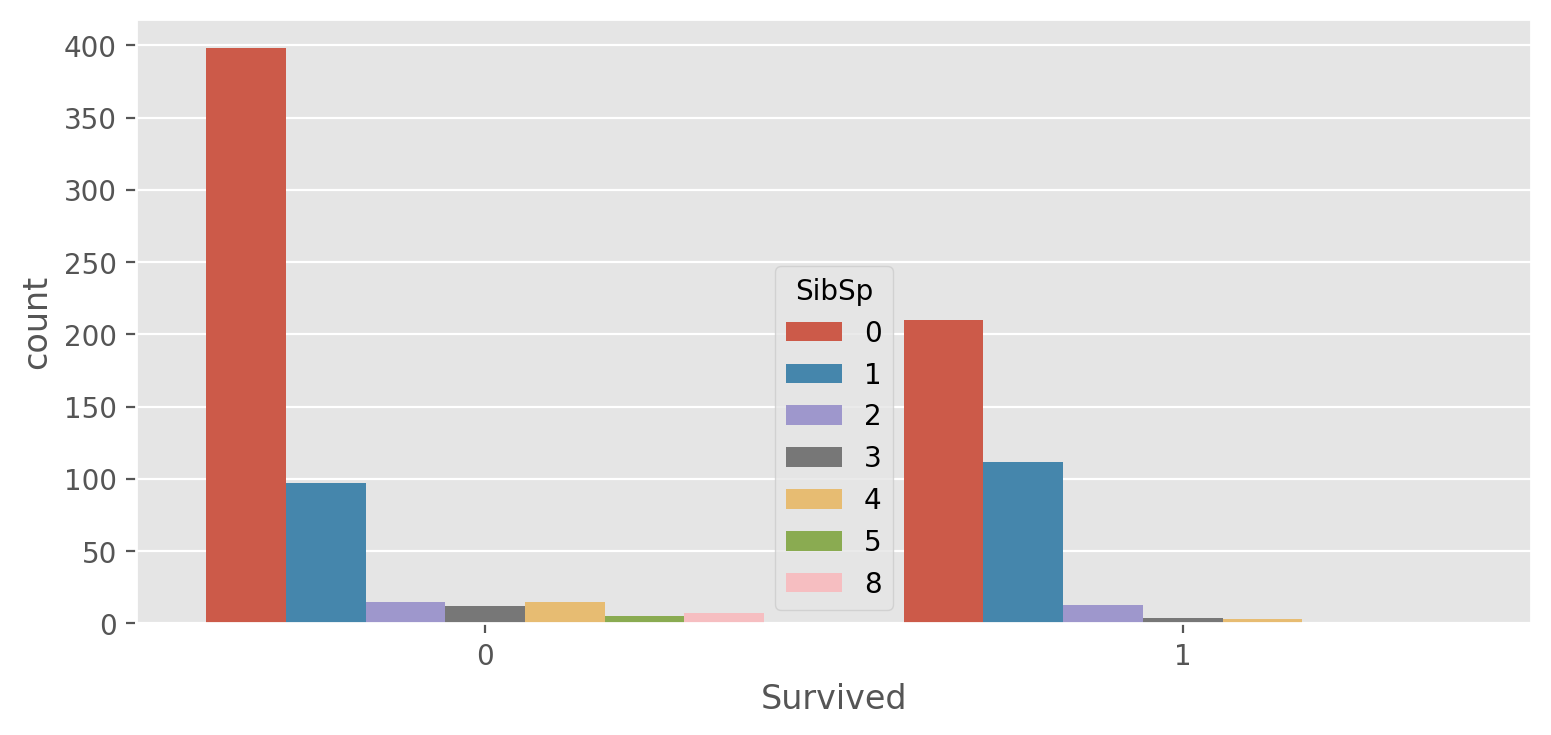

In [72]:
plt.figure(figsize = (9,4), dpi = 200)
sns.countplot(x = 'Survived', hue = 'SibSp', data = data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

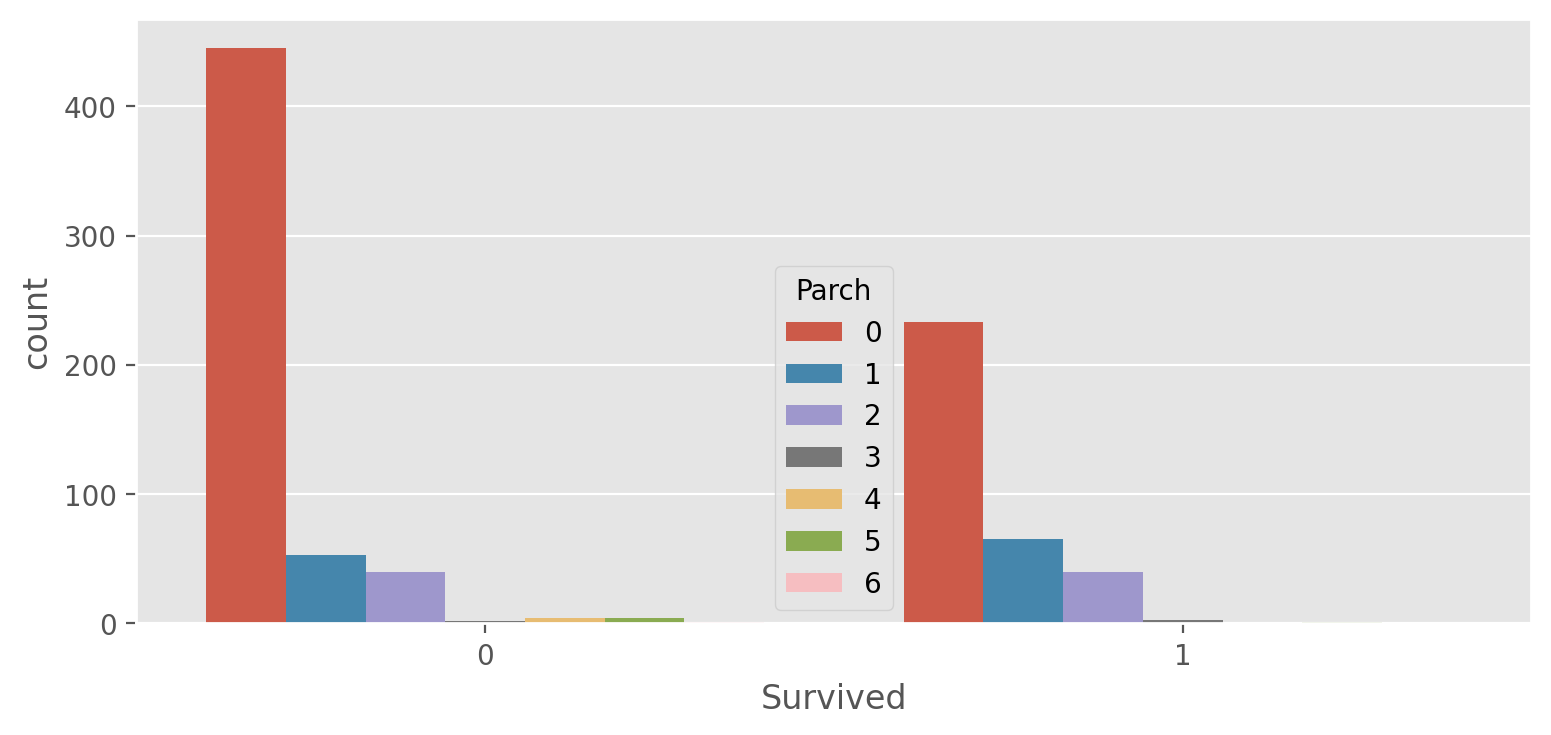

In [73]:
plt.figure(figsize = (9,4), dpi = 200)
sns.countplot(x = 'Survived', hue = 'Parch', data = data)

# ----------------------------------------------------------------------------------

In [74]:
data['Fam_members'] = data['SibSp'] + data['Parch']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fam_members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [75]:
data['Sex'] = data['Sex'].map({'female' : 0, 'male' : 1}).astype(int)
data['Embarked'] = data['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2}).astype(int)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fam_members
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0


In [76]:
cols = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Fam_members']
X = data[cols].values
Y = data[['Survived']].values

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [78]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing  Data Shape   : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (712, 6)
Training Labels Shape :  (712, 1)
Testing  Data Shape   :  (179, 6)
Testing Labels Shape  :  (179, 1)


In [79]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [80]:
classifier.predict(x_test[:50])

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0], dtype=int64)

In [81]:
print('Training Set Accuracy : ', classifier.score(x_train, y_train))
print('Testing Set Accuracy  : ', classifier.score(x_test, y_test))

Training Set Accuracy :  0.7991573033707865
Testing Set Accuracy  :  0.8156424581005587


# ================================================
# Classification Evaluation Metric

In [82]:
pred_train = classifier.predict(x_train)
pred_test  = classifier.predict(x_test)

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss

In [84]:
cm = confusion_matrix(y_test, pred_test)
cm

array([[99, 12],
       [21, 47]], dtype=int64)

In [97]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


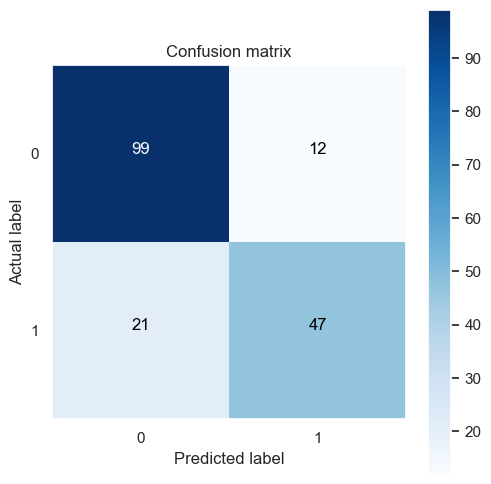

In [98]:
plt.figure(figsize = (5,5), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(cm, [0,1])

- True Negatives  (Actual : 0, Predicted : 0) = 99
- True Positives  (Actual : 1, Predicted : 1) = 47
- False Positives (Actual : 0, Predicted : 1) = 12
- False Negatives (Actual : 1, Predicted : 0) = 21

In [99]:
accuracy_score(y_test, pred_test)

0.8156424581005587

In [100]:
(99 + 47)/179

0.8156424581005587

In [101]:
precision_score(y_test, pred_test)

0.7966101694915254

In [102]:
47/(47 + 12)

0.7966101694915254

In [103]:
recall_score(y_test, pred_test)

0.6911764705882353

In [104]:
47/(47 + 21)

0.6911764705882353

In [105]:
f1_score(y_test, pred_test)

0.7401574803149606

In [106]:
(2 * 0.7966 * 0.6912) / (0.7966 + 0.6912)

0.7401665815297754

In [107]:
log_loss(y_test, pred_test)

6.6449193398931055

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       111
           1       0.80      0.69      0.74        68

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179

